# T2-2. Pima Indians Diabetes(피마 인디언 당뇨병)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("C:\\Github\\Study\\jinwoo\\diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = pd.concat([X_train, X_test])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 147 to 174
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
678,678,3,121,52,0,0,36.0,0.127,25
500,500,2,117,90,19,71,25.2,0.313,21
256,256,3,111,56,39,0,30.1,0.557,30
80,80,3,113,44,13,0,22.4,0.140,22


### 이상치 찾기

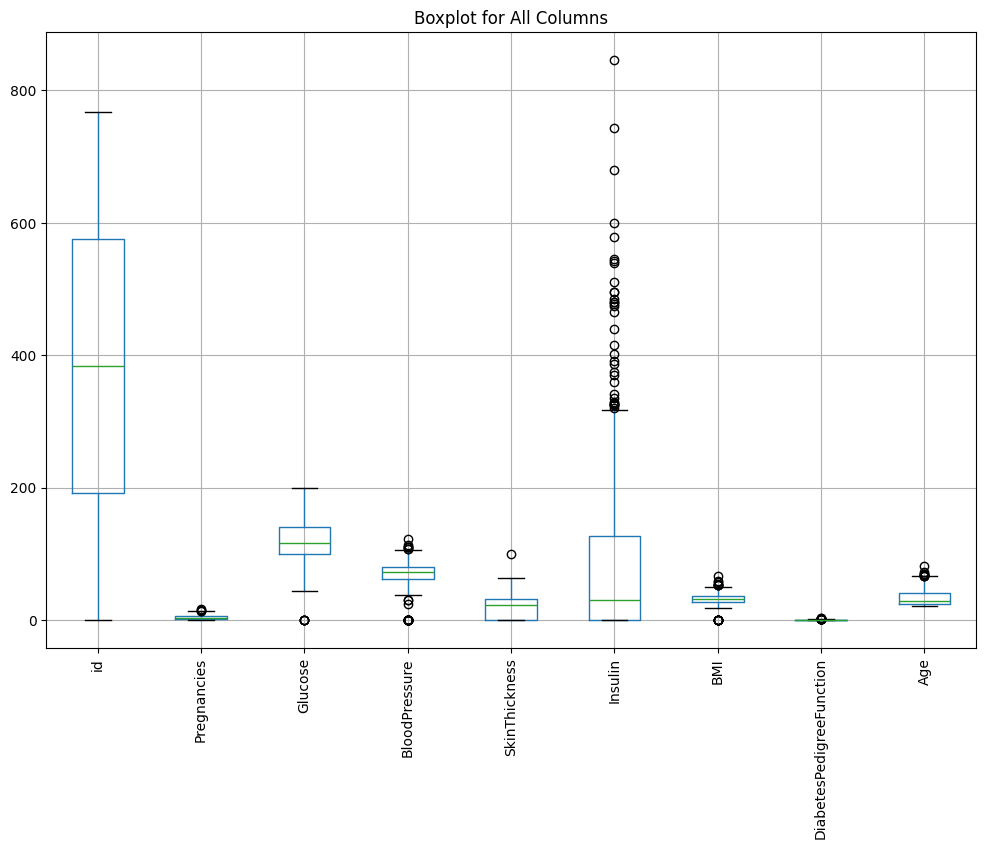

In [4]:
import matplotlib.pyplot as plt

# 데이터프레임의 모든 열에 대해 박스플롯 그리기
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot for All Columns")
plt.xticks(rotation=90)  # x축 라벨 회전 (필요 시 조정)
plt.show()

### 인슐린

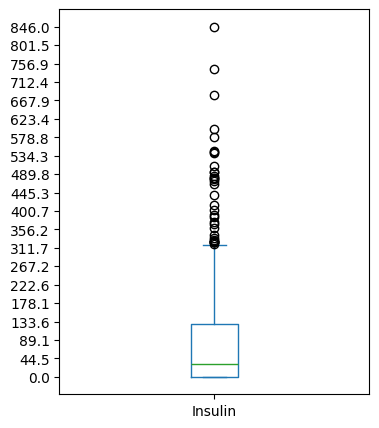

In [5]:
plt.figure(figsize=(4, 5))
df['Insulin'].plot(kind='box')
#plt.title("Boxplot for column_name")
y_min = df['Insulin'].min()
y_max = df['Insulin'].max()
plt.yticks(np.linspace(y_min, y_max, 20))
plt.show()

In [6]:
Q1 = X_train['Insulin'].quantile(0.25)  
Q3 = X_train['Insulin'].quantile(0.75) 
IQR = Q3 - Q1 

X_train['Insulin'] = np.where((X_train['Insulin'] < (Q1 - 1.5 * IQR)) | (X_train['Insulin'] > (Q3 + 1.5 * IQR)), X_train['Insulin'].median(), X_train['Insulin'])

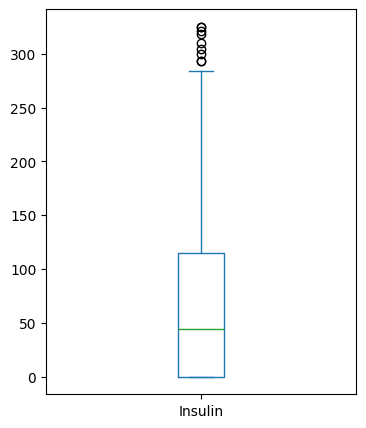

In [7]:
plt.figure(figsize=(4, 5))
X_train['Insulin'].plot(kind='box')
plt.show()

### pregnancies

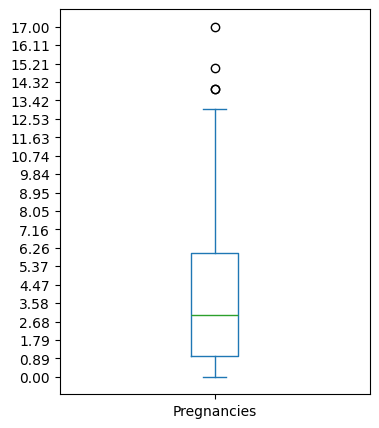

In [8]:
plt.figure(figsize=(4, 5))
df['Pregnancies'].plot(kind='box')
y_min = df['Pregnancies'].min()
y_max = df['Pregnancies'].max()
plt.yticks(np.linspace(y_min, y_max, 20))
plt.show()

In [9]:
Q1 = X_train['Pregnancies'].quantile(0.25)  
Q3 = X_train['Pregnancies'].quantile(0.75) 
IQR = Q3 - Q1

X_train['Pregnancies'] = np.where((X_train['Pregnancies'] < (Q1 - 1.5 * IQR)) | (X_train['Pregnancies'] > (Q3 + 1.5 * IQR)), X_train['Pregnancies'].median(), X_train['Pregnancies'])

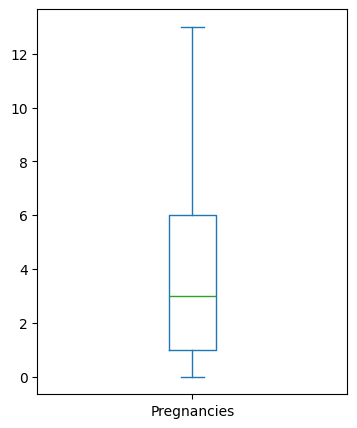

In [10]:
plt.figure(figsize=(4, 5))
X_train['Pregnancies'].plot(kind='box')
plt.show()

In [11]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),df[column].median(),df[column]
    )
    return df

X_train = replace_outliers(X_train, 'Glucose')
X_train = replace_outliers(X_train, 'BloodPressure')
X_train = replace_outliers(X_train, 'SkinThickness')
X_train = replace_outliers(X_train, 'BMI')
X_train = replace_outliers(X_train, 'DiabetesPedigreeFunction')
X_train = replace_outliers(X_train, 'Age')


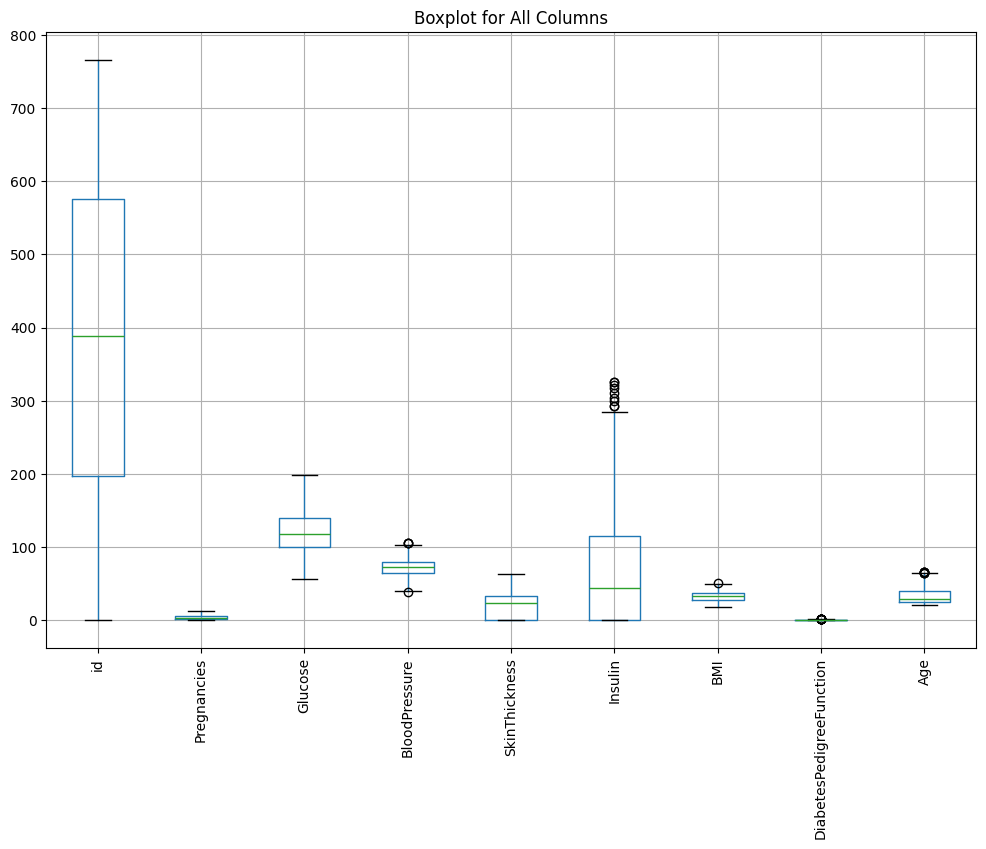

In [12]:
plt.figure(figsize=(12, 8))
X_train.boxplot()
plt.title("Boxplot for All Columns")
plt.xticks(rotation=90) 
plt.show()

In [19]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(7,7))\nsns.heatmap(df.corr(), annot=True)\n'

In [14]:
X_train = df[:len(X_train)]
X_test = df[len(X_train):]

X_train.shape, X_test.shape

((614, 9), (154, 9))

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train['Outcome'])

RandomForestClassifier()

In [16]:
prediction = model.predict(X_test)
prediction

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [17]:
result = pd.DataFrame({'idx':X_test.index, 'Outcome':prediction})
result

,idx,Outcome
0,258,1
1,220,1
2,438,0
3,130,1
4,730,0
...,...,...
149,678,0
150,500,0
151,256,0
152,80,0


In [18]:
model.score(X_test, y_test['Outcome'])

0.7792207792207793